In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
print(X_train_full.shape, y_train_full.shape)

(60000, 28, 28) (60000,)


In [22]:
#X_train_full is a collection of 60,000 28x28 images so X_train_full[0].shape gives us a tuple of (28x28)
X_train_full[0].shape

(28, 28)

In [23]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
class_names[y_train[0]]

'Coat'

In [29]:
nn_model = keras.models.Sequential()

In [31]:
nn_model.add(keras.layers.Flatten(input_shape=[28,28]))
nn_model.add(keras.layers.Dense(300, activation='relu'))
nn_model.add(keras.layers.Dense(100, activation = 'relu'))
nn_model.add(keras.layers.Dense(10, activation='softmax'))

In [32]:
#Alternatively :
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [33]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
hidden1 = nn_model.layers[1]
weights, biases = hidden1.get_weights()

In [38]:
weights, biases

(array([[ 0.06337568,  0.03662757,  0.00113556, ..., -0.06513789,
          0.03990671, -0.01554476],
        [-0.04000993, -0.01083291,  0.04539594, ...,  0.02939728,
         -0.02507824,  0.01239764],
        [ 0.00909567, -0.01688214,  0.00554388, ..., -0.05594544,
          0.01369441,  0.06177944],
        ...,
        [ 0.00014438, -0.00601154, -0.05837485, ...,  0.07324855,
          0.03267946,  0.06271803],
        [ 0.06052448,  0.03806239,  0.05618195, ..., -0.05695254,
         -0.0290926 , -0.06597988],
        [-0.00608511,  0.061288  , -0.05658631, ..., -0.07269742,
          0.00482304, -0.02610207]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [39]:
weights.shape

(784, 300)

In [41]:
nn_model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = "sgd", metrics = ["accuracy"])

In [42]:
history = nn_model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

W0812 09:49:52.379997 4511643072 deprecation.py:323] From /Users/prabesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 38us/sample - loss: 0.7201 - accuracy: 0.7637 - val_loss: 0.5032 - val_accuracy: 0.8316
Epoch 2/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4887 - accuracy: 0.8307 - val_loss: 0.4558 - val_accuracy: 0.8468
Epoch 3/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4445 - accuracy: 0.8448 - val_loss: 0.4048 - val_accuracy: 0.8600
Epoch 4/30
55000/55000 [==============================] - 2s 33us/sample - loss: 0.4171 - accuracy: 0.8533 - val_loss: 0.4064 - val_accuracy: 0.8608
Epoch 5/30
55000/55000 [==============================] - 2s 33us/sample - loss: 0.3971 - accuracy: 0.8615 - val_loss: 0.3929 - val_accuracy: 0.8650
Epoch 6/30
55000/55000 [==============================] - 2s 33us/sample - loss: 0.3811 - accuracy: 0.8662 - val_loss: 0.4041 - val_accuracy: 0.8490
Epoch 7/30
55000/55000 [==============================] -

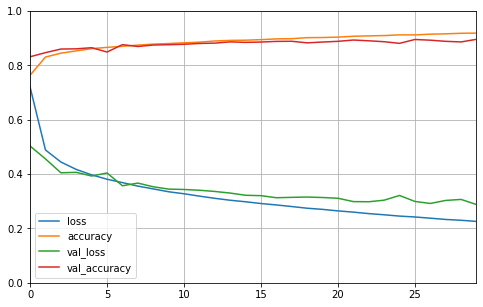

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
nn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/sample - loss: 2.2941 - accuracy: 0.8551


[2.2941078224949525, 0.8551]

In [54]:
X_new = X_test[:3]
y_proba = nn_model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
y_pred = nn_model.predict_classes(X_new)

In [57]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

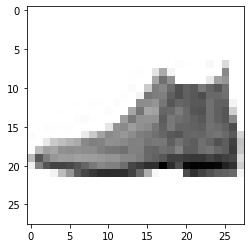

In [61]:
plt.imshow(X_new[0], cmap = 'binary')

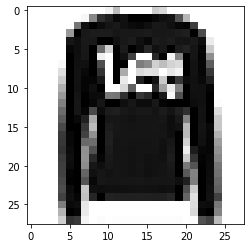

In [63]:
plt.imshow(X_new[1], cmap = 'binary')

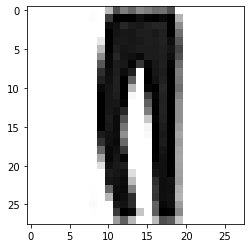

In [64]:
plt.imshow(X_new[2], cmap = 'binary')